In [45]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

In [56]:
import pandas as pd
import numpy as np

dtypes = {'country':'int64','device_id':'int64','platform':'category','ref_type_id':'category','source_id':'category'}
cols = ['date','device_id','platform','ref_type_id','source_id']
auctions = pd.read_csv(r'C:\Users\Matias\Documents\UBA\Datos\auctions.csv.gzip', usecols = cols, compression = 'gzip', dtype = dtypes)

In [120]:
auctions['date'] = pd.to_datetime(events['date'])
auctions['hour'] = auctions['date'].apply(lambda x: x.hour)
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 8 columns):
date                   datetime64[ns]
device_id              int64
platform               category
ref_type_id            category
source_id              category
auction_count_value    int32
day                    object
hour                   int64
dtypes: category(3), datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 727.9+ MB


In [64]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id,auction_count_value,hour
0,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0,1,14
1,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0,1,14
2,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0,1,14
3,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0,1,14
4,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0,1,14


In [173]:
auctions['auction_count_value'] = 1
auctions['auction_count_value'] = auctions['auction_count_value'].astype('int32')

In [174]:
byDevice = auctions.groupby('device_id').agg({'auction_count_value':'sum'})

Text(0, 0.5, 'auctions')

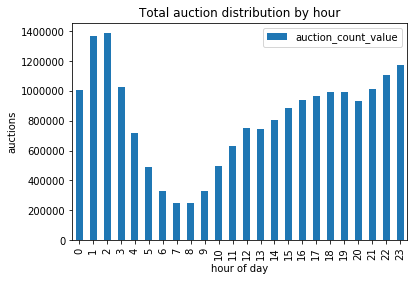

In [65]:
ax = auctions.groupby('hour').agg({'auction_count_value':'sum'}).plot.bar(title = 'Total auctions distributed by hour')
ax.set_xlabel("hour of day")
ax.set_ylabel("auctions")

In [200]:
top10PercentDevices = byDevice.nlargest(math.ceil(auctions['device_id'].nunique()*.1),'auction_count_value')
top10PercentDevices = auctions[auctions['device_id'].isin(top10PercentDevices.index.tolist())]

bot90PercentDevices = byDevice.nsmallest(math.ceil(auctions['device_id'].nunique()*.9),'auction_count_value')
bot90PercentDevices = auctions[auctions['device_id'].isin(bot90PercentDevices.index.tolist())]

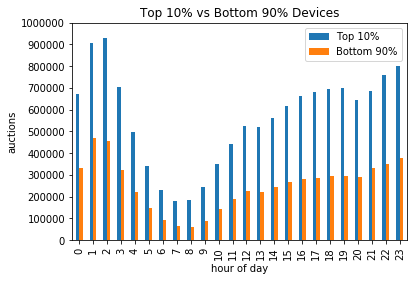

In [181]:
botPercentDevices = bot90PercentDevices.groupby('hour').agg({'auction_count_value':'sum'})
topPercentDevices = top10PercentDevices.groupby('hour').agg({'auction_count_value':'sum'})
comparison = botPercentDevices
comparison['Top 10%'] = topPercentDevices['auction_count_value']
comparison['Bottom 90%'] = comparison['auction_count_value']
comparison.drop('auction_count_value', axis=1, inplace = True)

yt = [i*100000 for i in range(0,11)]
ax = comparison.plot.bar(title = 'Top 10% vs Bottom 90% Devices', yticks = yt)
ax.set_xlabel("hour of day")
ax.set_ylabel("auctions")

#
topPercentDevices = None
botPercentDevices = None

In [183]:
auctions['day'] = auctions['date'].apply(lambda x: x.day)

In [184]:
totalByDay = auctions.groupby('day').agg({'auction_count_value':'sum'})

In [196]:
daysOrdered = ['Tue','Wed','Thu','Fri','Sat','Sun','Mon']

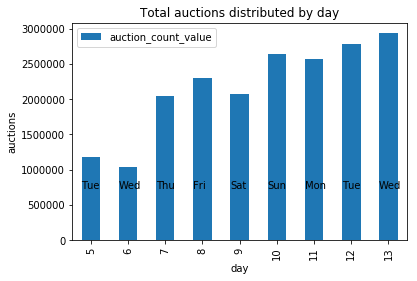

In [197]:
ax = totalByDay.plot.bar(title = 'Total auctions distributed by day')
ax.set_xlabel("day")
ax.set_ylabel("auctions")
i= 0
for p in ax.patches:
    ax.annotate(s = daysOrdered[i%len(daysOrdered)], xy = (p.get_x(), totalByDay['auction_count_value'].max()/4))
    i = i + 1
#5 Martes

In [206]:
botPercentDevices = bot90PercentDevices.groupby('day').agg({'auction_count_value':'sum'})
topPercentDevices = top10PercentDevices.groupby('day').agg({'auction_count_value':'sum'})

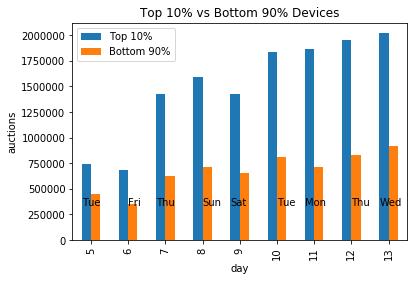

In [207]:
comparison = botPercentDevices
comparison['Top 10%'] = topPercentDevices['auction_count_value']
comparison['Bottom 90%'] = comparison['auction_count_value']
comparison.drop('auction_count_value', axis=1, inplace = True)

ax = comparison.plot.bar(title = 'Top 10% vs Bottom 90% Devices')
ax.set_xlabel("day")
ax.set_ylabel("auctions")
i= 0
for p in ax.patches:
    if i%2 == 0:
        ax.annotate(s = daysOrdered[i%len(daysOrdered)], xy = (p.get_x(), topPercentDevices['auction_count_value'].max()/6))
    i = i + 1

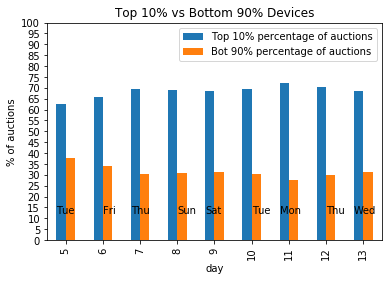

In [222]:
botPercentDevices = bot90PercentDevices.groupby('day').agg({'auction_count_value':'sum'})
topPercentDevices = top10PercentDevices.groupby('day').agg({'auction_count_value':'sum'})

topPercentDevices = topPercentDevices.div(totalByDay, level='day') * 100
botPercentDevices = botPercentDevices.div(totalByDay, level='day') * 100
comparison = botPercentDevices
comparison['Top 10% percentage of auctions'] = topPercentDevices['auction_count_value']
comparison['Bot 90% percentage of auctions'] = botPercentDevices['auction_count_value']
comparison.drop('auction_count_value', axis=1, inplace = True)

yt = [i*5 for i in range(0,21)]
ax = comparison.plot.bar(title = 'Top 10% vs Bottom 90% Devices', yticks = yt)
ax.set_xlabel("day")
ax.set_ylabel("% of auctions")
i= 0
for p in ax.patches:
    if i%2 == 0:
        ax.annotate(s = daysOrdered[i%len(daysOrdered)], xy = (p.get_x(), topPercentDevices['auction_count_value'].max()/6))
    i = i + 1

In [223]:
comparison

,Top 10% percentage of auctions,Bot 90% percentage of auctions
day,,
5,62.396683,37.595029
6,65.947704,34.039614
7,69.497490,30.507198
8,69.205541,30.813391
9,68.462155,31.517986
10,69.416281,30.577957
11,72.360341,27.647698
12,70.267742,29.734488
13,68.763666,31.243310


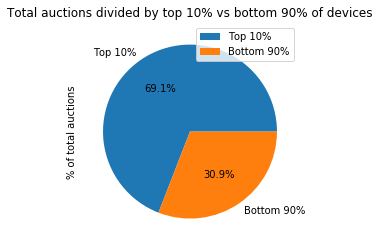

In [221]:
botPercentDevices = bot90PercentDevices.groupby('day').agg({'auction_count_value':'sum'})
topPercentDevices = top10PercentDevices.groupby('day').agg({'auction_count_value':'sum'})
total = pd.DataFrame({'% of total auctions':[topPercentDevices['auction_count_value'].sum(),botPercentDevices['auction_count_value'].sum()]},
                    index = ['Top 10%','Bottom 90%'])
total.plot.pie(y = '% of total auctions',autopct='%1.1f%%',title = 'Total auctions divided by top 10% vs bottom 90% of devices')

In [ ]:
#With this we can conclude that during that week almost 70% of the auctions were made by 10% of the devices